In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from datetime import datetime

In [60]:
# Read data
df = pd.read_csv('Dataset/BA_AirlineReviews.csv')
print(df.shape)

(3701, 20)


In [61]:
df.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [62]:
df.columns

Index(['Unnamed: 0', 'OverallRating', 'ReviewHeader', 'Name', 'Datetime',
       'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route',
       'DateFlown', 'SeatComfort', 'CabinStaffService', 'GroundService',
       'ValueForMoney', 'Recommended', 'Aircraft', 'Food&Beverages',
       'InflightEntertainment', 'Wifi&Connectivity'],
      dtype='object')

<h1>Data Processing</h1>

In [63]:
#renaming column to ID
df.rename(columns={"Unnamed: 0": "Id"}, inplace=True)
df.columns

Index(['Id', 'OverallRating', 'ReviewHeader', 'Name', 'Datetime',
       'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route',
       'DateFlown', 'SeatComfort', 'CabinStaffService', 'GroundService',
       'ValueForMoney', 'Recommended', 'Aircraft', 'Food&Beverages',
       'InflightEntertainment', 'Wifi&Connectivity'],
      dtype='object')

In [64]:
df.describe()

,Id,OverallRating,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Food&Beverages,InflightEntertainment,Wifi&Connectivity
count,3701.000000,3696.000000,3585.000000,3574.000000,2855.000000,3700.000000,3315.000000,2551.000000,609.000000
mean,1850.000000,4.734307,2.875314,3.254057,2.784238,2.688378,2.713122,2.646021,1.924466
std,1068.531001,3.175306,1.362081,1.489709,1.457058,1.471887,1.437092,1.398509,1.352705
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,925.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1850.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,2775.000000,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,3700.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [65]:
df.isnull().sum()

Id                          0
OverallRating               5
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

The missing values dont are not seen in the ReviewBody and OverallRating which are more important fields

We split the data columns for the ease of further analysis

In [66]:
# sentimentral analysis and word cloud
df_1 = df[['Id', 'OverallRating', 'ReviewHeader', 'Datetime',
       'VerifiedReview', 'ReviewBody']]

# Analize numerical values
df_2 = df[['Id', 'OverallRating',
       'TypeOfTraveller', 'SeatType', 'Route', 'SeatComfort', 'CabinStaffService', 'GroundService',
       'ValueForMoney', 'Recommended', 'Aircraft', 'Food&Beverages',
       'InflightEntertainment', 'Wifi&Connectivity']]

<h3>Prepareing df_1 for Analysis</h3>

In [67]:
df_1.isnull().sum()

Id                0
OverallRating     5
ReviewHeader      0
Datetime          0
VerifiedReview    0
ReviewBody        0
dtype: int64

In [68]:
df_1.dropna(inplace=True)

C:\Users\anshu\AppData\Local\Temp\ipykernel_26180\871821986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.dropna(inplace=True)


In [69]:
df_1.isnull().sum()

Id                0
OverallRating     0
ReviewHeader      0
Datetime          0
VerifiedReview    0
ReviewBody        0
dtype: int64

In [70]:
# remove St, nd, rd from date
def stripDate(date_str):
    return date_str.replace('st', '').replace('nd', '').replace('rd', '').replace('th', '')

In [71]:
# ix month name in date
month_mapping = {
    'Augu': 'August',
}

def makeDate(date_str):
    for month_abbr, month_full in month_mapping.items():
        if month_abbr in date_str:
            date_str = date_str.replace(month_abbr, month_full)
            break
    return datetime.strptime(date_str, "%d %B %Y")

In [72]:
df['Datetime'] = df['Datetime'].apply(stripDate)

In [73]:
df['Datetime'] = df['Datetime'].apply(makeDate)

<h3>Prepareing df_2 for Analysis</h3>

In [74]:
df_2.isnull().sum()

Id                          0
OverallRating               5
TypeOfTraveller           771
SeatType                    2
Route                     775
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

Dropping columns "Wifi&Connectivity", "Aircraft", "InflightEntertainment" since most of the values are blank

And dropping rest of the NA values

In [75]:
df_2 = df_2.drop(columns=["Wifi&Connectivity", "Aircraft", "InflightEntertainment"])
df_2.dropna(inplace=True)
df_2.isnull().sum()

Id                   0
OverallRating        0
TypeOfTraveller      0
SeatType             0
Route                0
SeatComfort          0
CabinStaffService    0
GroundService        0
ValueForMoney        0
Recommended          0
Food&Beverages       0
dtype: int64

In [76]:
df_2.shape

(2531, 11)

<h1>EDA</h1>

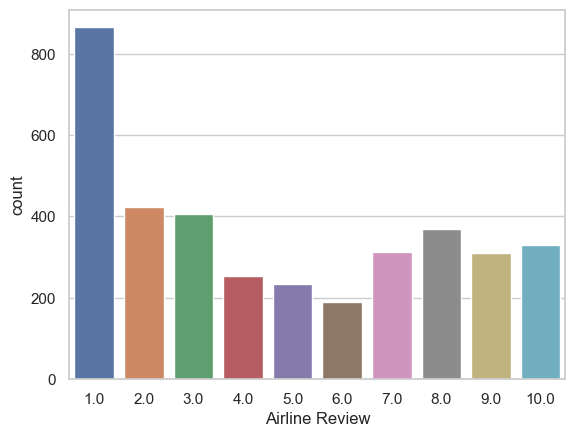

In [155]:
# overall rating plot
sns.countplot(data=df_1, x='OverallRating', hue='OverallRating', palette='deep', legend=False)
plt.xlabel('Airline Review')
plt.show()

we can observe that the data is skewed to the left indicating that there are more low rating reviews given to the Airline 

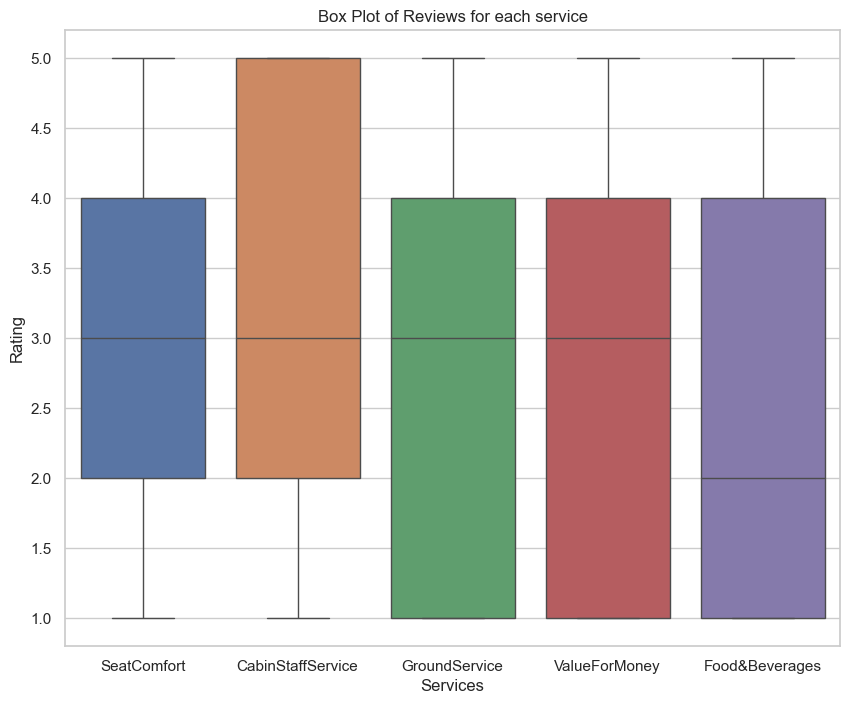

In [156]:
# plotting the services vs rating in a boxplot to observe the spread of the ratings
df_boxplt = df_2[[ 'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney', 'Food&Beverages']]

sns.set(style='whitegrid')

plt.figure(figsize=(10, 8)) 
sns.boxplot(data=df_boxplt, palette='deep')
plt.xlabel('Services')
plt.ylabel('Rating')
plt.title('Box Plot of Reviews for each service')

plt.show()

* We can see that the median of 'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney' is above 2.5 i.e. most people found the service above average for the the following services.
* For 'SeatComfort', 'GroundService', 'ValueForMoney', 'Food&Beverages' the 75th persentile are around 4.0 and max is at 5.0 this shows some good response
* On the other hand when we look at the 25th percentile for 'GroundService', 'ValueForMoney', 'Food&Beverages' it is with the minimum rating at 1.0

From the above plot we can observe that few people have a good feedback(3.5 - 5) for the 'SeatComfort', 'CabinStaffService' with the majority of people around the average rating(2 - 3.5).

Where as for the 'GroundService', 'ValueForMoney', 'Food&Beverages' perople overall have a negative feedback for the services(1 - 3.5/4)

In [157]:
# plot seperate graphs for verified and non verified users to see if there is any bias
df_verified = df_1[df_1["VerifiedReview"] == True]
df_nonverified = df_1[df_1["VerifiedReview"] == False]

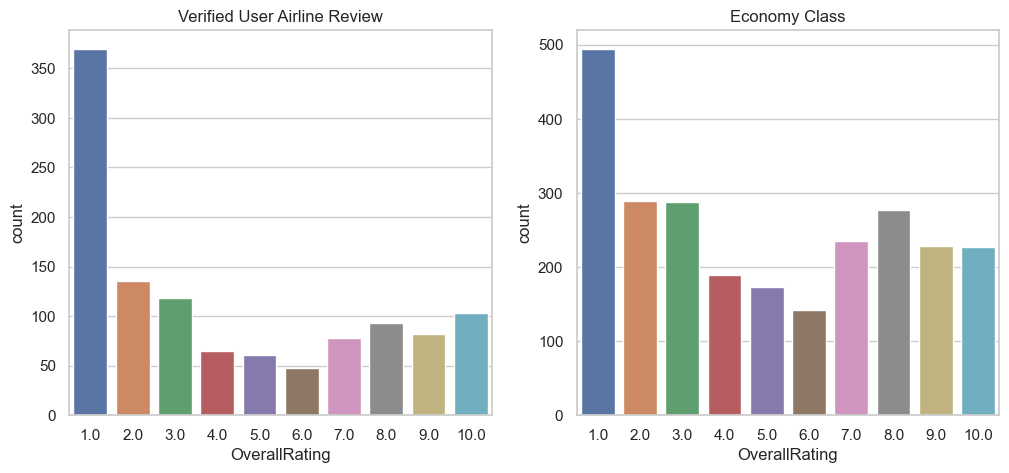

In [158]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# plot for verified users
sns.countplot(data=df_verified, x='OverallRating', hue='OverallRating', ax = axs[0], palette='deep', legend=False)
axs[0].set_title("Verified User Airline Review")

# plot for non-verified users
sns.countplot(data=df_nonverified, x='OverallRating', hue='OverallRating', ax = axs[1], palette='deep', legend=False)
axs[1].set_title("Economy Class")

plt.show()

we can see that the skewness of data is more evident in the case of verified users but there is also slighr skewness in case of non verified users

So we can conclude that there is no evident bias in the data based on user status

In [159]:
# plot seperate graphs for different seat types to see if there is any bias
df_economy = df_2[df_2["SeatType"] == 'Economy Class']
df_business = df_2[df_2["SeatType"] == 'Business Class']
df_premium = df_2[df_2["SeatType"] == 'Premium Economy']
df_first = df_2[df_2["SeatType"] == 'First Class']

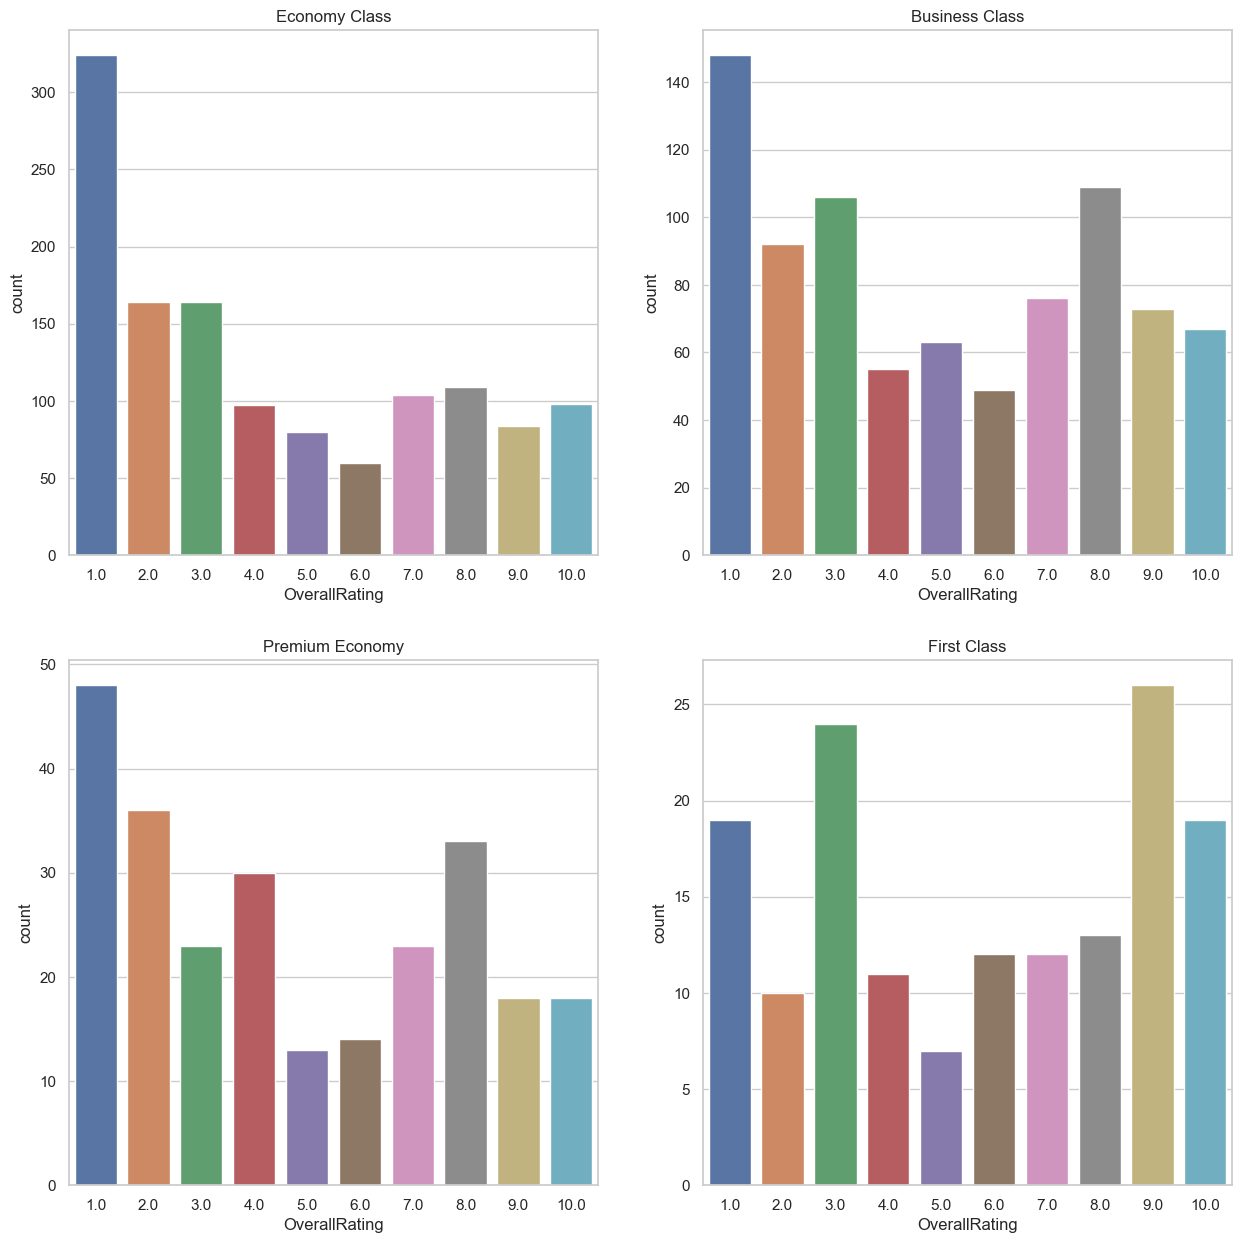

In [164]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# plot for Economy Class
sns.countplot(data=df_economy, x='OverallRating', hue='OverallRating', palette='deep', ax = axs[0][0], legend=False)
axs[0][0].set_title("Economy Class")

# plot for Business Class
sns.countplot(data=df_business, x='OverallRating', hue='OverallRating', palette='deep', ax = axs[0][1], legend=False)
axs[0][1].set_title("Business Class")

# plot for Premium Economy
sns.countplot(data=df_premium, x='OverallRating', hue='OverallRating', palette='deep', ax = axs[1][0], legend=False)
axs[1][0].set_title("Premium Economy")


# plot for First Class
sns.countplot(data=df_first, x='OverallRating', hue='OverallRating', palette='deep', ax = axs[1][1], legend=False)
axs[1][1].set_title("First Class")

plt.show()

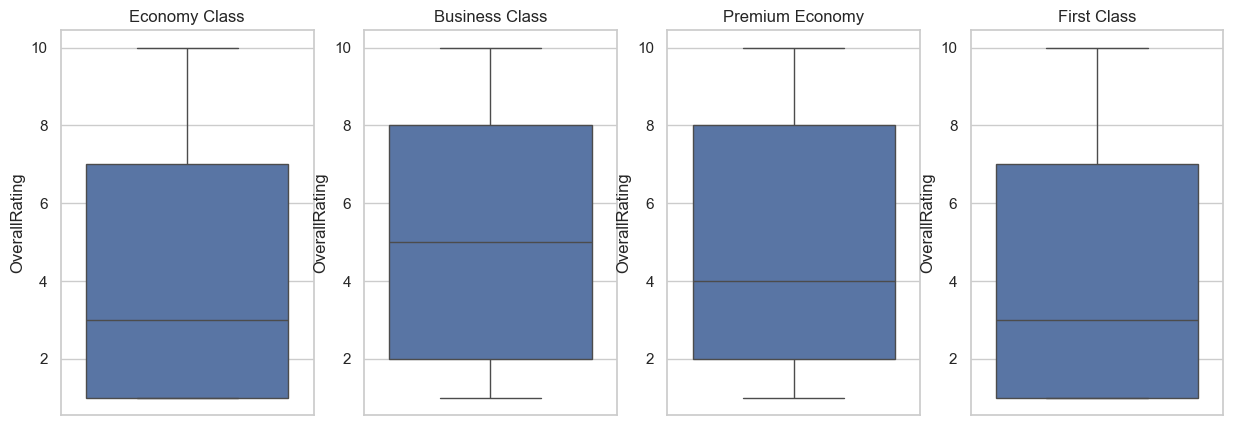

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [126]:
# plotting the boxplot for rating in each class
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

sns.set(style='whitegrid')

# Economy Class
plt.figure(figsize=(10, 8)) 
sns.boxplot(data=df_economy['OverallRating'], ax = axs[0])
axs[0].set_title('Economy Class')

# Business Class
plt.figure(figsize=(10, 8)) 
sns.boxplot(data=df_business['OverallRating'], ax = axs[1])
axs[1].set_title('Business Class')

# Premium Economy
plt.figure(figsize=(10, 8)) 
sns.boxplot(data=df_premium['OverallRating'], ax = axs[2])
axs[2].set_title('Premium Economy')

# First Class
plt.figure(figsize=(10, 8)) 
sns.boxplot(data=df_economy['OverallRating'], ax = axs[3])
axs[3].set_title('First Class')

plt.show()


df_economy = df_2[df_2["SeatType"] == 'Economy Class']
df_business = df_2[df_2["SeatType"] == 'Business Class']
df_premium = df_2[df_2["SeatType"] == 'Premium Economy']
df_first = df_2[df_2["SeatType"] == 'First Class']

From the above 2 plots it can be observed that 'Premium Economy' and 'Business Class' have a rating ranging from low-average to moderate. whereas the users from 'First Class' and 'Economy Class' have a rating ranging from low to average.

<Axes: xlabel='Recommended', ylabel='count'>

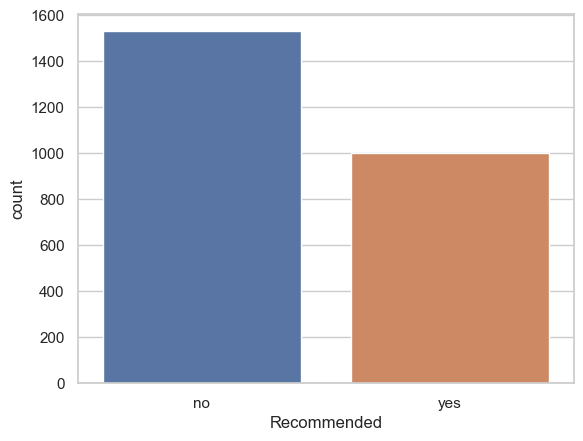

In [132]:
sns.countplot(data=df_2, x='Recommended', hue='Recommended')